<a href="https://colab.research.google.com/github/uanushkatkd/CS6910-Assignment-1/blob/main/Dl1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install wandb -qU
import wandb
!wandb login

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.3/181.3 KB 14.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 13.2 MB/s eta 0:00:00


In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

from tqdm import tqdm



In [ ]:


# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="CS6910_Assignment_1",
)
# Loading the fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
#class names for fashion-MNIST
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# creating 2x5 grid 
img={}

for i in range(10):
    # to find first image in the training set with class label i
    idx = np.where(y_train == i)[0][0]
    # Plot the image
    img[class_names[i]]=(wandb.Image(x_train[idx], caption=class_names[i]))
    
wandb.log(img)    
# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

NameError: ignored

4422102/4422102 [==============================] - 0s 0us/step


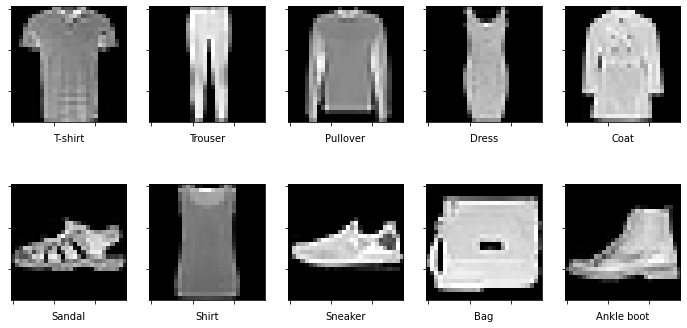

In [3]:
# Loading the fashion-MNIST dataset
(x_tr, y_tr), (x_test, y_test) = fashion_mnist.load_data()


x_train,x_val,y_train, y_val = train_test_split(x_tr,y_tr ,random_state=104,test_size=0.10, shuffle=True)
#class names for fashion-MNIST
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
# creating 2x5 grid 
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))
ax1=ax.flat
for i in range(10):
    # to find first image in the training set with class label i
    idx = np.where(y_train == i)[0][0]
    # Plot the image
    ax1[i].imshow(x_train[idx], cmap='gray')
    ax1[i].set_xlabel(class_names[i])
    ax1[i].set_xticklabels([])
    ax1[i].set_yticklabels([])
    

   
# Display the plot
plt.show()

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)


(54000, 28, 28)
(54000,)
(6000, 28, 28)
(6000,)
(10000, 28, 28)
(10000,)


In [5]:
# Normalize data
x_train,x_val,x_test= x_train/255.0,x_val/255.0,x_test/255.0

#one hot encoding

#Reshaping train and test data
x_train,x_val,x_test=x_train.reshape(len(x_train),28*28),x_val.reshape(len(x_val),28*28),x_test.reshape(len(x_test),28*28)

# one hot encoding
#from keras.utils import to_categorical
def onehot_encoding(a,n_class):
  temp = []
  for i in a:
    t1 = np.zeros(n_class)
    t1[i] = 1
    temp.append(t1)
  temp=np.array(temp)
  return temp
y_train=onehot_encoding(y_train,10)  #run once only
y_val = onehot_encoding(y_val,10)
y_test = onehot_encoding(y_test,10)
print(y_val)

#y_test = to_categorical(y_test, dtype ="uint8")
  
# Labels after applying the function
# Training set labels
#print(x_train.shape)
print(y_val.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]]
(6000, 10)


In [28]:
hidden_layer=[256,128,64]
no_of_class=10
layer_dim=[x_train.shape[1]]+hidden_layer+[no_of_class]
print(layer_dim)
def initialise_params(train,label,layers):

  params={}
  L=len(layers)
  w=[]
  b=[]
  for i in range(1,L):
    params['W'+str(i)]= np.random.randn(layers[i], layers[i-1]) * 0.05
    params['b' + str(i)] =  np.zeros((layers[i], 1))

  return params  

def forward_prop(train,label,layers,params):
  L=len(layers)
  a={}
  h={}
  h['h'+str(0)]=(train.T)
  
  for i in range(1,L-1):
    #preactivation calculation
    print(i)
    a['a'+str(i)]= params['W'+str(i)] @ h['h'+str(i-1)]+ params['b'+str(i)]
    
    #activation calculation
    h['h'+str(i)]=sigmoid(a['a'+str(i)])
    
  a['a'+str(L-1)]= params['W'+str(L-1)] @ (h['h'+str(L-2)]) +params['b'+str(L-1)]
  y_prob=[]
  for i in range(len(a['a'+str(L-1)][0])):
    y_prob.append(softmax(a['a'+str(L-1)][:,i]))
  y_prob=np.array(y_prob)
  h['h'+str(L-1)]=y_prob
  
  return a,h,y_prob

def sigmoid(x):
  return 1/(1+np.exp(-x))

def softmax(x):
   return (np.exp(x)/np.exp(x).sum())



p=initialise_params(x_train,y_train,layer_dim)
for key,val in p.items():
  print(key,'->',val.shape)
  
a1,h1,y_h=forward_prop(x_train[:10,:],y_train[:10,:],layer_dim,p)
print((y_h[0]))
for key,val in a1.items():
  print(key,'->',val.shape)
for key,val in h1.items():
  print(key,'->',val.shape)

#print(y_train)

[784, 256, 128, 64, 10]
W1 -> (256, 784)
b1 -> (256, 1)
W2 -> (128, 256)
b2 -> (128, 1)
W3 -> (64, 128)
b3 -> (64, 1)
W4 -> (10, 64)
b4 -> (10, 1)
1
2
3
[0.11376594 0.10254888 0.08662787 0.08376724 0.12092482 0.12642622
 0.09333518 0.083074   0.10950988 0.08001998]
a1 -> (256, 10)
a2 -> (128, 10)
a3 -> (64, 10)
a4 -> (10, 10)
h0 -> (784, 10)
h1 -> (256, 10)
h2 -> (128, 10)
h3 -> (64, 10)
h4 -> (10, 10)


In [12]:

#y_train=y_train[:5,:]
#x_train=x_train[:5,:]
#print(y_train)


In [11]:
class NN:
  def __init__(self, layers, epochs, lr,loss_func,batch_size=16):
    self.layers = layers
    self.epochs = epochs
    self.lr = lr
    self.loss_func=loss_func
    self.batch_size=batch_size
    self.params={}
    self.L=len(self.layers)
    
  def initialise_params(self):
    for i in range(1,self.L):
      self.params['W'+str(i)]= np.random.randn(self.layers[i], self.layers[i-1]) * 0.1
      self.params['b' + str(i)] =  np.zeros((self.layers[i], 1))

    return self.params  
  
  def updates(self):
    updates={}
    for i in range(1,self.L):
      updates['W'+str(i)]= np.zeros((self.layers[i], self.layers[i-1])) 
      updates['b' + str(i)] =  np.zeros((self.layers[i], 1))

    return updates  

  def sigmoid(self, x, derivative=False):
      if derivative:
          return (np.exp(-x))/((np.exp(-x)+1)**2)
      return 1/(1 + np.exp(-x))

  def tanh(self, x, derivative=False):
      t=(np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))
      if derivative:
          return 1-t**2
    
      return t

  def relu(self, x, derivative=False):
      if derivative:
          return 1*(x>0)
      return np.maximum(0,x)


  def softmax(self, x, derivative=False):
      if derivative:
          return  (np.exp(x)/np.exp(x).sum()) * (1- (np.exp(x)/np.exp(x).sum()))
      return  (np.exp(x)/np.exp(x).sum())
  
  
  def forward_prop(self,train):
      params = self.params
      L=self.L
      a={}
      h={}
      train=train.T
      h['h'+str(0)]=train.reshape(len(train),1)
      for i in range(1,L-1):
        #preactivation calculation
        #print(i)
        a['a'+str(i)]= params['W'+str(i)] @ h['h'+str(i-1)]+ params['b'+str(i)]
        #activation calculation
        h['h'+str(i)]=self.sigmoid(a['a'+str(i)])
       
      a['a'+str(L-1)]= params['W'+str(L-1)] @ (h['h'+str(L-2)]) +params['b'+str(L-1)]
      y_prob=[]
      for i in range(len(a['a'+str(L-1)][0])):
        y_prob.append(self.softmax(a['a'+str(L-1)][:,i]))
      y_prob=np.array(y_prob)
      h['h'+str(L-1)]=y_prob
  
      return a,h,y_prob
  def backward_prop(self, y_train, y_hat,a,h):
    params = self.params
    delta_params = {}
    L=self.L
    y_train=y_train.reshape(len(y_train),1)
    # Compute output gradient
        # Gardient with respect to last layer
    if self.loss_func == 'cross_entropy':
      delta_params['a' + str(L-1)] = (y_hat - y_train)
    elif self.loss_func == 'squared_error':
      delta_params['a' + str(L-1)] = (y_hat - y_train)*y_hat*(1-y_hat)
    
    
    for i in range(L-1,0,-1):
      #gradients w rt parameters 
      delta_params['W' + str(i)]=(delta_params['a' + str(i)]@(h['h'+str(i-1)].T))
      delta_params['b' + str(i)]=np.sum(delta_params['a' + str(i)],axis=1,keepdims=True)

      #gradients w rt layer below

      delta_params['h' + str(i-1)]=(params['W' + str(i)].T)@ delta_params['a' + str(i)]

      #gradients w rt layer below(preactivation)

      if i > 1:
        delta_params['a' + str(i-1)] = delta_params['h' + str(i-1)] * self.sigmoid(a['a' + str(i-1)], derivative=True)  
    return delta_params
  
  
  def loss_fun(self,y,y_hat):
    if self.loss_func == 'cross_entropy':
      i=np.argmax(y)
      p=y_hat[i]
      #N=len(y)
      loss=-np.log(p)
      return loss
    elif self.loss_func == 'squared_error':
      return np.sum((y-y_hat)**2)
 
 
  def modelPerformance(self, x_test, y_test):
    predictions = []
    y_true = []
    y_pred = []
    losses = []
    for x,y in tqdm(zip(x_test ,y_test), total=len(x_test)):
      a,h,y_p = self.forward_prop(x)
      predictedClass = np.argmax(y_p)
      y.reshape(len(y),1)
      actualClass = np.argmax(y)
      y_true.append(actualClass)
      y_pred.append(predictedClass)
      predictions.append(predictedClass == actualClass)
      losses.append(self.loss_fun(y.T,y_p.T))
    accuracy = (np.sum(predictions)*100)/len(predictions)
    loss = np.sum(losses)/len(losses)
    
    return accuracy, loss, y_true, y_pred

     
  def sgd(self,x_train,y_train):
    weights=self.initialise_params()
    #print(weights)
    #print(len(x_train[0]))
    t=0
    e=self.epochs
    for i in range(e):
      print("epoch",i+1)
      for x,y in (zip(x_train,y_train)):
        a,h,y_p=self.forward_prop(x)
        
        #print("y_hat",y[0])
        delta_theta=self.backward_prop(y.T,y_p.T,a,h)
        #print("weights->",weights[i].shape)
        #print("delta theta->",delta_theta)
        #print("Y_train[0]",y_train.shape)

        #weights[i]= weights[i-1]+  delta_theta[i]
        t=t+1
        if (t%self.batch_size==0):
          for key in weights:
            weights[key]=weights[key] - (self.lr)*delta_theta[key]
    test_acc,test_loss,y_true,y_perd=self.modelPerformance(x_test,y_test)
    print("Test Accuracy = " + str(test_acc))
    print("Test Loss = " + str(test_loss))
		
    val_acc,val_loss,y_true1,y_perd1=self.modelPerformance(x_val,y_val)
    print("Val Accuracy = " + str(val_acc))
    print("Val Loss = " + str(val_loss))

    train_acc,train_loss,y_true2,y_perd2=self.modelPerformance(x_train,y_train)
    print("Train Accuracy = " + str(train_acc))
    print("Train Loss = " + str(train_loss))
	
	
    return weights

  def momentum(self,x_train,y_train):
    beta=0.001
    
    weights=self.initialise_params()
    
    t=0
    e=self.epochs
    for i in range(e):

      update= self.updates()
      print("epoch",i+1)
      for x,y in (zip(x_train,y_train)):
        dw_db= self.updates()
   
        a,h,y_p=self.forward_prop(x)
        
        #print("y_hat",y[0])
        delta_theta=self.backward_prop(y.T,y_p.T,a,h)
        #print("weights->",weights[i].shape)
        #print("delta theta->",delta_theta)
        #print("Y_train[0]",y_train.shape)

        #weights[i]= weights[i-1]+  delta_theta[i]
        for i in dw_db:
           dw_db[i]+=delta_theta[i]

        t=t+1
        if (t%self.batch_size==0):
          for key in update:
            update[key]=beta*update[key]+self.lr*dw_db[key]
          for key in weights:
           weights[key]=weights[key] - update[key]

         
    test_acc,test_loss,y_true,y_perd=self.modelPerformance(x_test,y_test)
    print("Test Accuracy = " + str(test_acc))
    print("Test Loss = " + str(test_loss))
		
    val_acc,val_loss,y_true1,y_perd1=self.modelPerformance(x_val,y_val)
    print("Val Accuracy = " + str(val_acc))
    print("Val Loss = " + str(val_loss))

    train_acc,train_loss,y_true2,y_perd2=self.modelPerformance(x_train,y_train)
    print("Train Accuracy = " + str(train_acc))
    print("Train Loss = " + str(train_loss))
		
    return weights
     
  def nestrov(self):
      pass   

  def rmsprop(self):
      pass   
    
  def adam(self):
      pass   
    
  def nadam(self):
      pass   

  def train(self, train_list, test_list, output_nodes):
      pass




hidden_layer=[16,16]
no_of_class=10
layer_dim=[x_train.shape[1]]+hidden_layer+[no_of_class]
print(layer_dim)
lr=0.001
nn = NN(layer_dim, epochs=10, lr=0.001,loss_func='cross_entropy')
#y=np.array(y)
#print(y.shape[1])
# pass y_hat and y_train in transposed 



w=nn.momentum(x_train,y_train)


#for key,val in delta_theta.items():
#  print(key,"-",val.shape)


[784, 16, 16, 10]
epoch 1
epoch 2
epoch 3
epoch 4
epoch 5
epoch 6
epoch 7
epoch 8
epoch 9
epoch 10


100%|██████████| 10000/10000 [00:01<00:00, 8343.07it/s]


Test Accuracy = 24.97
Test Loss = 2.235720393274464


100%|██████████| 6000/6000 [00:00<00:00, 8878.64it/s]


Val Accuracy = 25.016666666666666
Val Loss = 2.2363338539997937


100%|██████████| 54000/54000 [00:06<00:00, 8731.65it/s]


Train Accuracy = 24.93888888888889
Train Loss = 2.235386113104146
